In [15]:
import pandas as pd
import numpy as np
from plot_utils import *
from math_utils import *
import pathlib

In [16]:
R, h_v = thin_qr_factorization(np.random.normal(0, 1, (10, 2)))
A = apply_householder_transformations(np.eye(10), h_v)

0
File removed: 10.png
File removed: 1001.png
File removed: 1009.png
File removed: 101.png
File removed: 1034.png
File removed: 1047.png
File removed: 1061.png
File removed: 1084.png
File removed: 1094.png
File removed: 1121.png
File removed: 1148.png
File removed: 1154.png
File removed: 1176.png
File removed: 1188.png
File removed: 1191.png
File removed: 1195.png
File removed: 1197.png
File removed: 1203.png
File removed: 1218.png
File removed: 1220.png
File removed: 1223.png
File removed: 1231.png
File removed: 1246.png
File removed: 126.png
File removed: 1271.png
File removed: 1273.png
File removed: 1294.png
File removed: 1297.png
File removed: 13.png
File removed: 1333.png
File removed: 136.png
File removed: 1379.png
File removed: 1390.png
File removed: 1399.png
File removed: 1404.png
File removed: 1408.png
File removed: 1416.png
File removed: 1438.png
File removed: 1445.png
File removed: 1454.png
File removed: 1457.png
File removed: 1468.png
File removed: 148.png
File removed: 148

In [3]:
a = load_image_as_grayscale_matrix('./data/img/mnist/0/101.png')
a

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [5]:
resize_image(a, 100,100)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(100, 100))

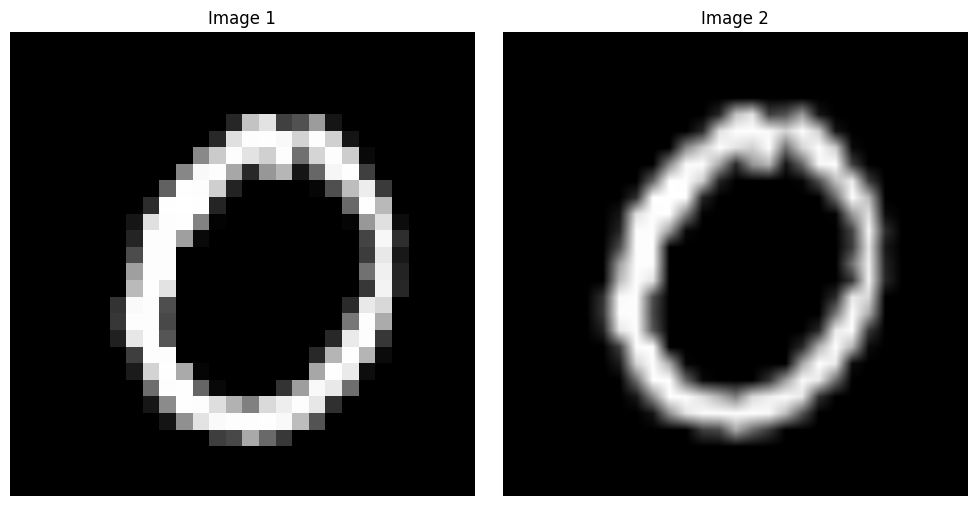

In [6]:
show_grayscale_images([a, resize_image(a, 500, 500)], 2)